In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

In [75]:
df = pd.read_csv('complaints_2018_final.csv')

df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [76]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,453608592,2018-12-21,10:00 AM,2018-12-21,14:00:00,7.0,2019-01-02,341,petit_larceny,338,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
1,878647334,2018-10-17,14:30 PM,2018-10-18,18:40:00,104.0,2019-01-15,341,petit_larceny,349,...,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267
2,128026914,2018-12-24,20:00 PM,NaN,NaN,45.0,2019-01-02,341,petit_larceny,349,...,4438.0,1.158795e+07,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091
3,997752766,2018-09-17,07:00 AM,NaN,NaN,62.0,2019-01-07,112,theft_fraud,739,...,77354.0,4.355518e+07,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603
4,746011851,2018-09-04,10:00 AM,NaN,NaN,52.0,2019-12-09,116,sex_crimes,168,...,97932.0,6.933617e+07,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179


In [77]:
df = df[df.boro_nm != 'unknown']

In [78]:
df.cmplnt_num.nunique()

905671

In [79]:
df.shape

(916841, 34)

In [80]:
df.isnull().sum()

cmplnt_num                          0
cmplnt_fr_dt                        0
cmplnt_fr_tm                        0
cmplnt_to_dt                   121384
cmplnt_to_tm                   120888
addr_pct_cd                         0
rpt_dt                              0
ky_cd                               0
ofns_desc                           0
pd_cd                               0
pd_desc                             0
law_cat_cd                          0
boro_nm                             0
prem_typ_desc                       0
susp_age_group                      0
susp_race                           0
susp_sex                            0
latitude                            0
longitude                           0
patrol_boro                         0
vic_age_group                       0
vic_race                            0
vic_sex                             0
neighborhood                        0
population                          0
area                                0
county      

In [81]:
df.dropna()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,453608592,2018-12-21,10:00 AM,2018-12-21,14:00:00,7.0,2019-01-02,341,petit_larceny,338,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
1,878647334,2018-10-17,14:30 PM,2018-10-18,18:40:00,104.0,2019-01-15,341,petit_larceny,349,...,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267
5,860498393,2018-06-03,08:00 AM,2019-08-03,13:00:00,111.0,2019-08-03,112,theft_fraud,739,...,7060.0,2.424279e+07,Queens,11363.0,370854.0,110.045697,378123.0,112.202671,273319.0,101.984701
6,328344212,2018-10-31,21:30 PM,2018-10-31,21:40:00,90.0,2018-10-31,106,felony_assault,109,...,83575.0,4.070072e+07,Kings,11206.0,1146373.0,32.688138,1162178.0,33.138808,641845.0,28.577248
9,412016658,2018-11-20,18:30 PM,2018-11-26,18:30:00,77.0,2019-02-09,341,petit_larceny,343,...,46664.0,2.942942e+07,Kings,11238.0,2064377.0,70.528767,2102096.0,71.817424,1521860.0,62.448092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917450,584058766,2019-12-27,17:00 PM,2019-12-28,04:30:00,75.0,2019-12-28,341,petit_larceny,321,...,93556.0,7.396626e+07,Kings,11207.0,1206549.0,29.292280,1216052.0,29.522991,589617.0,23.195004
917451,333362495,2019-12-22,20:45 PM,2019-12-22,20:50:00,5.0,2019-12-29,341,petit_larceny,352,...,27985.0,1.558058e+07,New York,10013.0,4872698.0,323.552324,4935026.0,327.690969,3969171.0,347.563135
917453,915496604,2019-12-27,17:47 PM,2019-12-27,18:14:00,5.0,2019-12-27,341,petit_larceny,333,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
917454,670991668,2019-12-29,05:10 AM,2019-12-29,05:15:00,17.0,2019-12-29,341,petit_larceny,333,...,15918.0,9.794383e+06,New York,10017.0,4079743.0,343.702022,4126925.0,347.676917,3278880.0,307.587242


In [82]:
df['ofns_desc']

0                        petit_larceny
1                        petit_larceny
2                        petit_larceny
3                          theft_fraud
4                           sex_crimes
                      ...             
917451                   petit_larceny
917452    assault_3_&_related_offenses
917453                   petit_larceny
917454                   petit_larceny
917455                   petit_larceny
Name: ofns_desc, Length: 916841, dtype: object

In [83]:
#Linh's sort function:
#---
def sort_crime(column):
    column = str(column).upper()
    if 'ASSAULT' in column:
        return 'ASSAULT'.lower()
    elif 'MURDER' in column or 'HOMICIDE' in column:
        return 'MURDER'.lower()
    elif 'HARRASSMENT' in column:
        return 'HARRASSMENT'.lower()
    elif 'SEX' in column:
        return "SEX_CRIMES".lower()
    elif 'PETIT_LARCENY' in column:
        return 'PETIT_LARCENY'.lower()
    elif 'GRAND_LARCENY' in column:
        return 'GRAND LARCENY'.lower()
    elif 'FELONY ASSAULT' in column:
        return 'FELONY ASSAULT'.lower()
    elif 'BURGLAR' in column:
        return 'BURGLAR'.lower()
    elif 'KIDNAPPING' in column:
        return 'KIDNAPPING'.lower()
    elif 'FRAUD' in column:
        return 'FRAUD'.lower()
    elif 'GAMBLING' in column:
        return'GAMBLING'.lower()
    elif 'MOTOR' in column or 'TRAFFIC' in column or 'VEHICLE' in column or 'DRIVING' in column :
        return 'MOTOR_VEHICLE_CRIME'.lower()
    elif 'CRIMINAL_MISCHIEF' in column:
        return 'CRIMINAL_MISCHIEF'.lower()
    elif 'DRUGS' in column:
        return 'DRUGS'.lower()
    elif 'THEF' in column or 'STOLEN' in column:
        return 'THEFT'.lower()
    elif 'LAW' in column:
        return 'UNCLASSIFIED_LAW'.lower()
    elif 'TRESPASS' in column:
        return "TRESPASS".lower()
    elif 'OFF' in column and 'THEF'not in column:
        return 'OFFENSE'.lower()
    elif 'ARSON' in column:
        return 'ARSON'.lower()
    elif 'FORGERY' in column:
        return 'FORGERY'.lower()
    elif 'WEAP' in column:
        return 'WEAPON'.lower()
    elif 'CHILD' in column or 'ABORTION' in column:
        return 'CHILD_RELATED'.lower()
    elif 'JOST' in column or 'CONDUCT' in column:
        return "DISORDERLY_CONDUCT".lower()
    elif 'ROBBERY' in column:
        return 'ROBBERY'.lower()
    else:
        return 'misc_other'

In [84]:
df['crime_type'] = df['ofns_desc'].map(sort_crime)
df['crime_type'][:10]

0    petit_larceny
1    petit_larceny
2    petit_larceny
3            fraud
4       sex_crimes
5            fraud
6          assault
7            arson
8          offense
9    petit_larceny
Name: crime_type, dtype: object

In [85]:
df['crime_type'].value_counts()

petit_larceny          174831
assault                146381
harrassment            141583
grand larceny           96068
criminal_mischief       93995
offense                 57820
unclassified_law        29876
drugs                   28541
robbery                 26149
motor_vehicle_crime     25898
burglar                 23001
fraud                   14746
weapon                  14137
sex_crimes              13505
forgery                  9907
theft                    6589
trespass                 6287
misc_other               5197
arson                    1427
gambling                  444
kidnapping                254
disorderly_conduct        142
child_related              38
murder                     25
Name: crime_type, dtype: int64

In [86]:
def crime_value(column):
    if column.upper() == 'MISDEMEANOR':
        return 2
    elif column.upper() == 'VIOLATION':
        return 1
    elif column.upper() == 'FELONY':
        return 3
df['crime_level'] = df['law_cat_cd'].map(crime_value)
df['crime_level']

0         2
1         2
2         2
3         3
4         3
         ..
917451    2
917452    2
917453    2
917454    2
917455    2
Name: crime_level, Length: 916841, dtype: int64

In [87]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,crime_type,crime_level
0,453608592,2018-12-21,10:00 AM,2018-12-21,14:00:00,7.0,2019-01-02,341,petit_larceny,338,...,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,petit_larceny,2
1,878647334,2018-10-17,14:30 PM,2018-10-18,18:40:00,104.0,2019-01-15,341,petit_larceny,349,...,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,petit_larceny,2
2,128026914,2018-12-24,20:00 PM,NaN,NaN,45.0,2019-01-02,341,petit_larceny,349,...,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,petit_larceny,2
3,997752766,2018-09-17,07:00 AM,NaN,NaN,62.0,2019-01-07,112,theft_fraud,739,...,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,fraud,3
4,746011851,2018-09-04,10:00 AM,NaN,NaN,52.0,2019-12-09,116,sex_crimes,168,...,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,sex_crimes,3


### INCOME

In [88]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'law_cat_cd', 'boro_nm', 'prem_typ_desc', 'susp_age_group',
       'susp_race', 'susp_sex', 'latitude', 'longitude', 'patrol_boro',
       'vic_age_group', 'vic_race', 'vic_sex', 'neighborhood', 'population',
       'area', 'county', 'zipcodes', 'adjusted_gross_income_(agi)', 'avg_agi',
       'total_income_amount', 'avg_total_income', 'taxable_income_amount',
       'avg_taxable_income', 'crime_type', 'crime_level'],
      dtype='object')

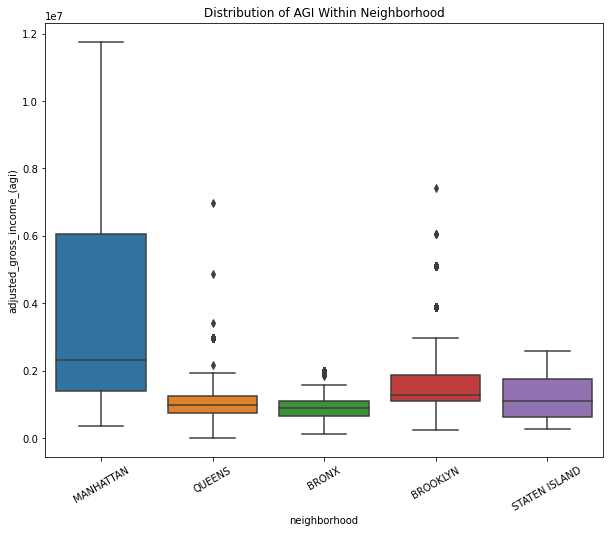

In [89]:
plt.figure(figsize = (10, 8))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Neighborhood')
sns.boxplot(x= df['neighborhood'], y = df['adjusted_gross_income_(agi)'].sort_values());

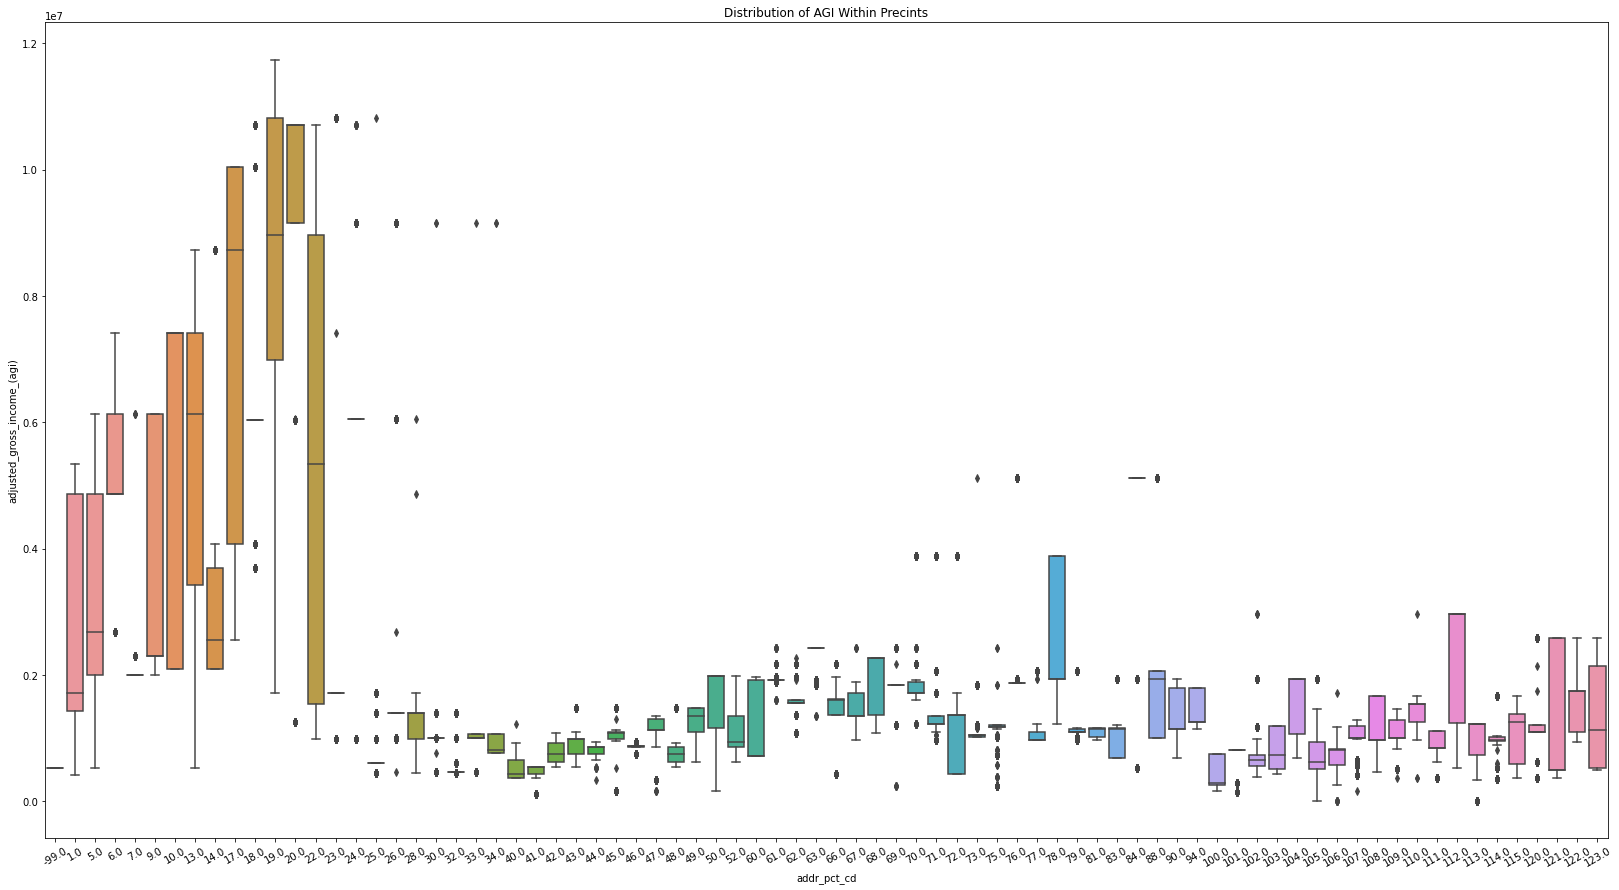

In [90]:
plt.figure(figsize = (28, 15))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Precints')
sns.boxplot(x= df['addr_pct_cd'], y = df['adjusted_gross_income_(agi)'].sort_values());

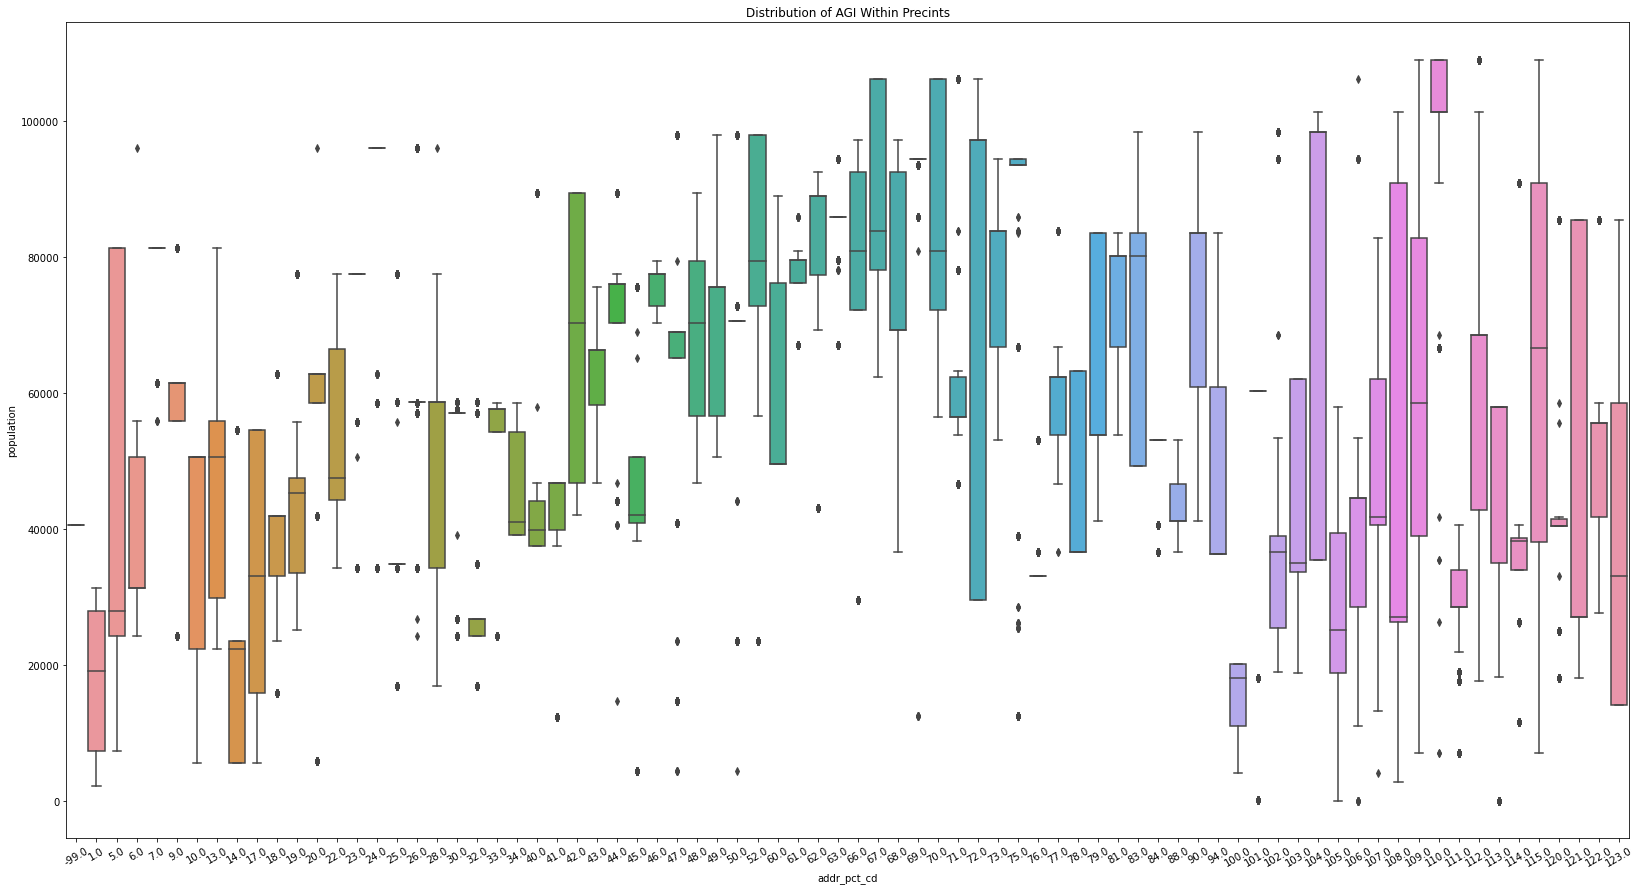

In [91]:
plt.figure(figsize = (28, 15))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Precints')
sns.boxplot(x= df['addr_pct_cd'], y = df['population'].sort_values());

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

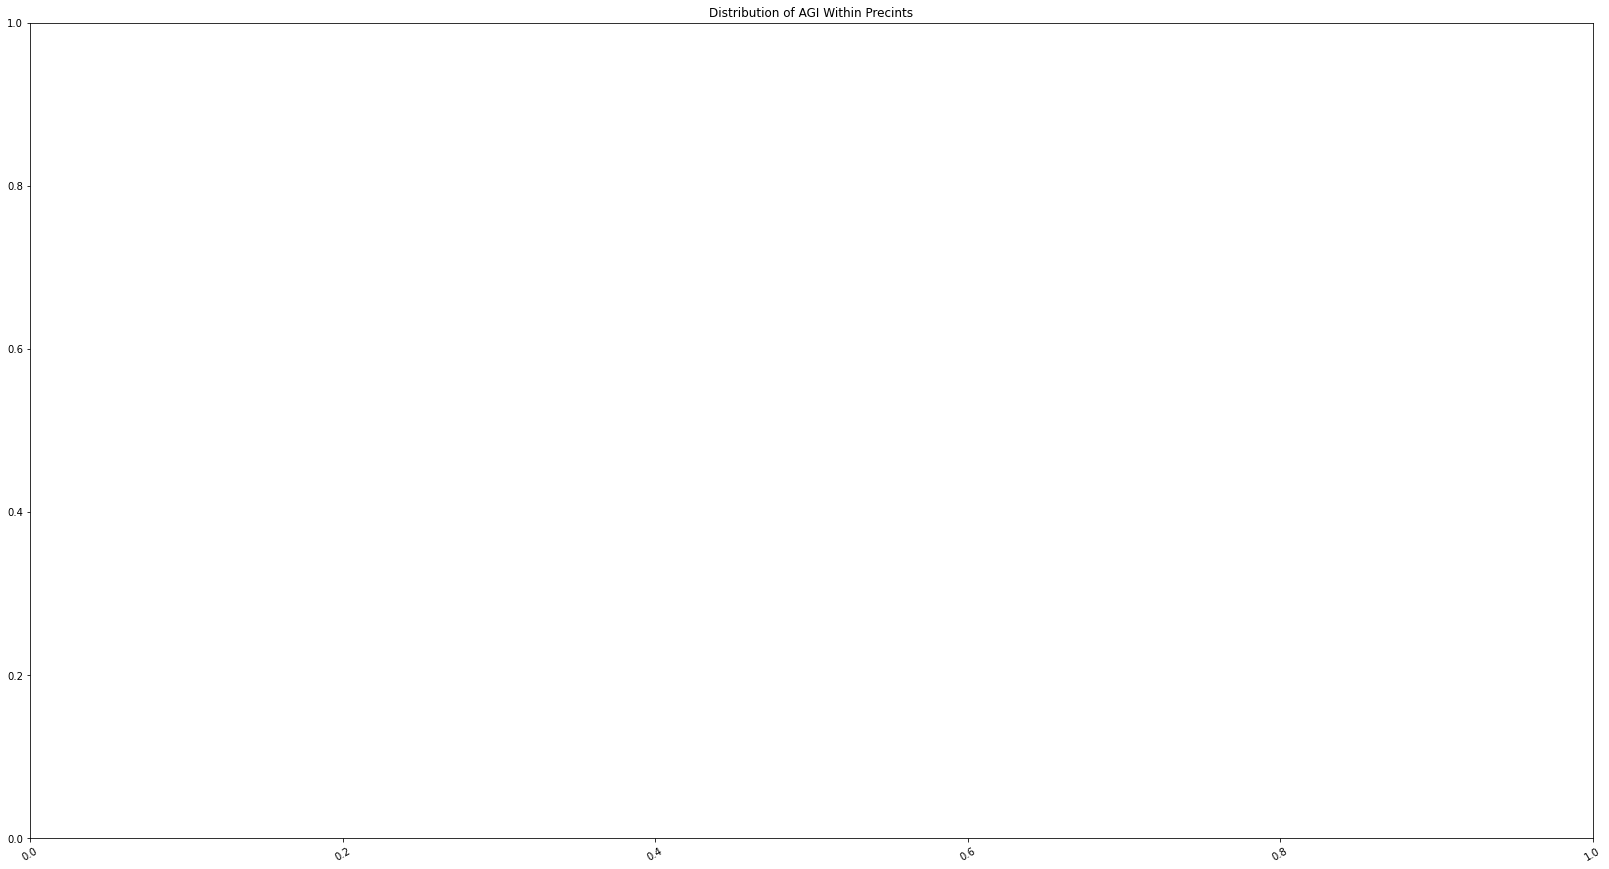

In [92]:
plt.figure(figsize = (28, 15))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Precints')
sns.boxplot(x= df['addr_pct_cd'], y = (df.groupby(['ofns_desc']).sum()));

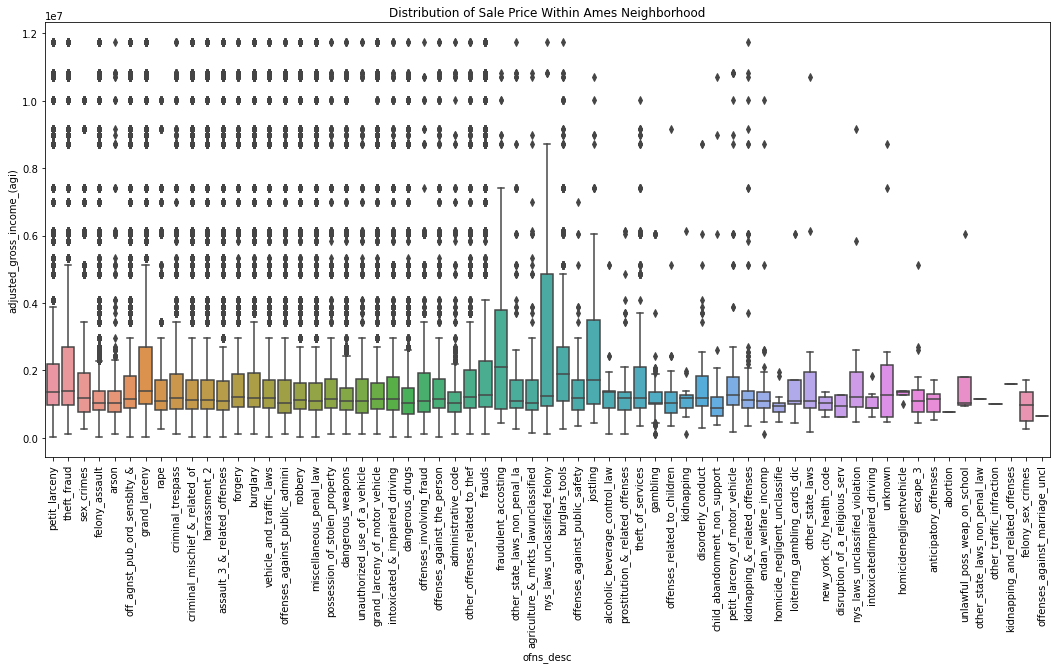

In [93]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
plt.title('Distribution of Sale Price Within Ames Neighborhood')
sns.boxplot(x= df['ofns_desc'], y = df['adjusted_gross_income_(agi)']);

### CRIME TIME

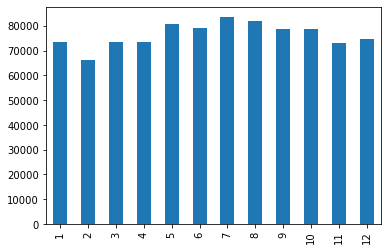

In [94]:
df['cmplnt_fr_dt'].dt.month.value_counts().sort_index().plot(kind= 'bar')

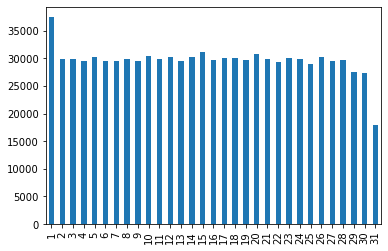

In [95]:
df['cmplnt_fr_dt'].dt.day.value_counts().sort_index().plot(kind= 'bar')

In [97]:
#df['cmplnt_fr_tm'] = pd.to_datetime(df['cmplnt_fr_tm'])
#df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index().plot(kind= 'bar')

AttributeError: Can only use .dt accessor with datetimelike values

In [99]:
day_1 = df[df['cmplnt_fr_dt'].dt.day == 1]

In [100]:
day_1['law_cat_cd'].value_counts()

misdemeanor    20612
felony         11236
violation       5617
Name: law_cat_cd, dtype: int64

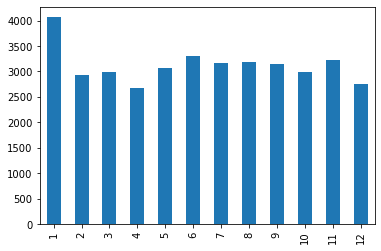

In [113]:
day_1['cmplnt_fr_dt'].dt.month.value_counts().sort_index().plot(kind='bar')

January has more Crimes on the first of the month.  
This is a indication of NEW YEARS which correlations to the 1 day of the month.

In [117]:
day_2 = df[df['cmplnt_fr_dt'].dt.day == 2]

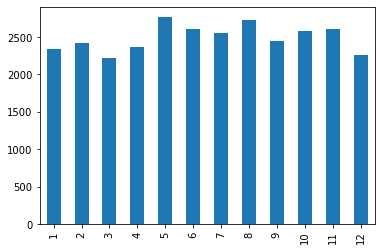

In [116]:
day_2['cmplnt_fr_dt'].dt.month.value_counts().sort_index().plot(kind='bar')

In [102]:
day_2['law_cat_cd'].value_counts()

misdemeanor    16032
felony          9184
violation       4702
Name: law_cat_cd, dtype: int64

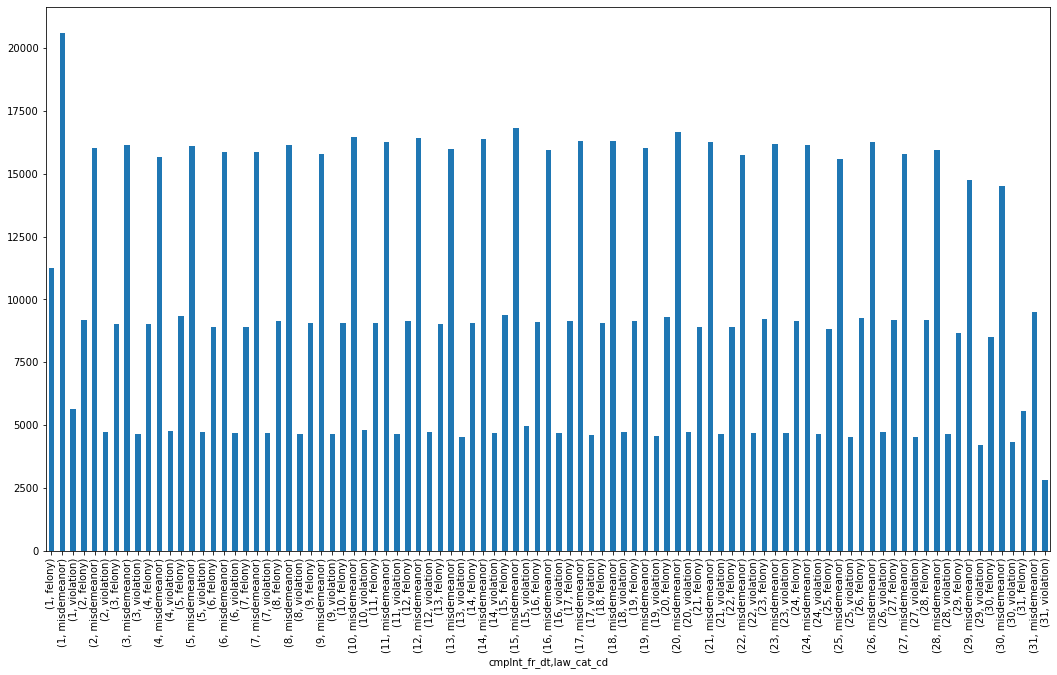

In [103]:
df.groupby([df['cmplnt_fr_dt'].dt.day,df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar', figsize =(18,10))

There is a small jump on the first day of the month. High rise in misdemeanor

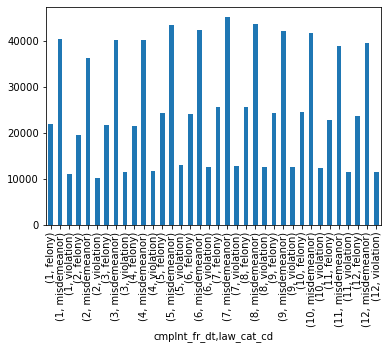

In [104]:
df.groupby([df['cmplnt_fr_dt'].dt.month,df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar')

Want to check the effects of weather on Crime, Colder months less crime;  However, December may have more due holiday? Feb Has the least? 

- Check Crime on January 1 compared to other dates, and close to Holidays


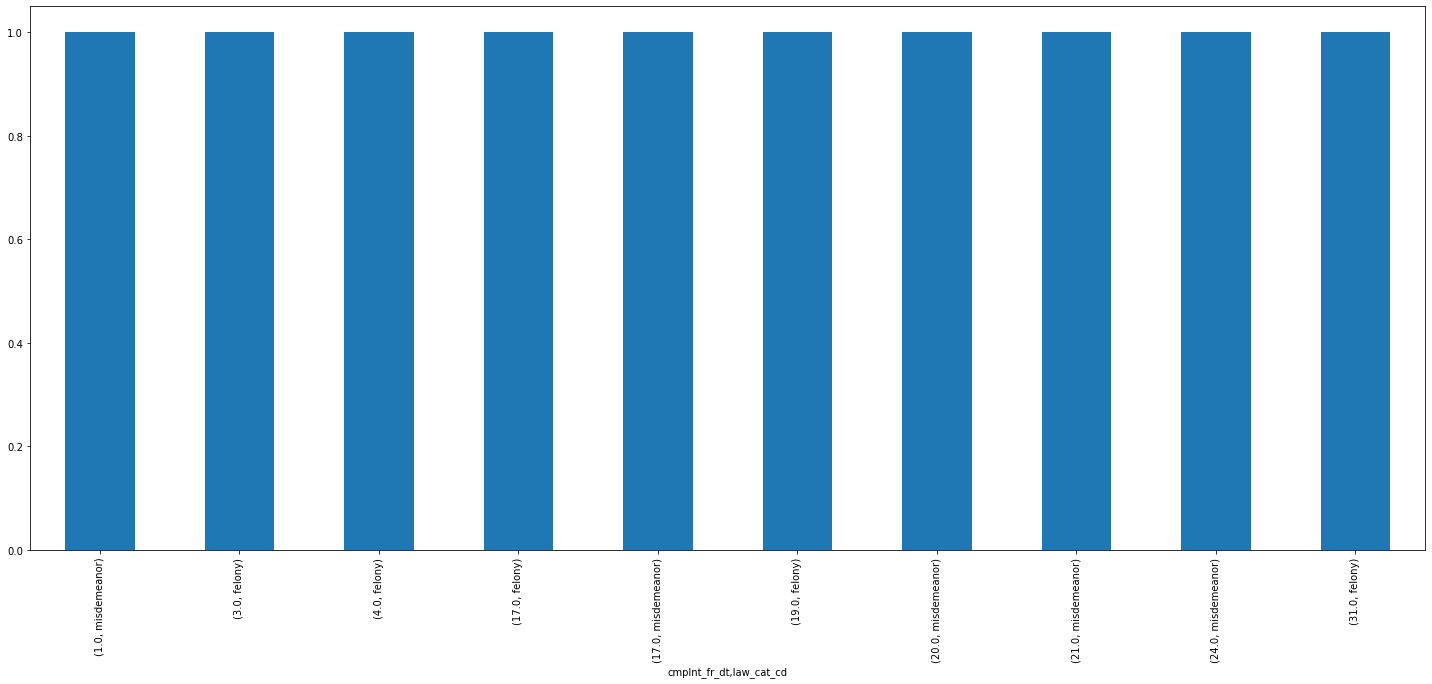

In [105]:
df.groupby([df['cmplnt_fr_dt'].dt.day.head(10),df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar', figsize =(25,10))

In [ ]:
df.info()

In [ ]:
df.columns

In [106]:
dum_crime = pd.get_dummies(df, drop_first = True)
# dum_crime = pd.get_dummies(df['ofns_desc','pd_cd',
#        'pd_desc', 'law_cat_cd', 'boro_nm', 'prem_typ_desc', 'susp_age_group',
#        'susp_race', 'susp_sex','vic_age_group', 'vic_race', 'vic_sex', 'neighborhood','county'], drop_first = True)
dum_crime.shape

(916841, 4962)

In [107]:
dum_df = pd.merge(left = dum_crime, right=df , left_index = True, right_index = True)
dum_df.shape

(916841, 4998)